### Practice Exercise (Polynomial Regression)

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
#loading the dataset file

%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys

current_dir = Path.cwd()

project_root = current_dir.parent.absolute()

sys.path.insert(0,str(project_root))

from config import DATASETS_DIR, TEMP_AND_ICE

In [7]:
#Dataset

df = pd.read_csv(TEMP_AND_ICE)

print(f'shape of the dataset: {df.shape}\n')
print(f'Missing vlaue:\n {df.isnull().sum()}')

#feature and target variable
X = df[['temperature_celsius']].values
y = df[['ice_cream_sales']].values

shape of the dataset: (25, 2)

Missing vlaue:
 temperature_celsius    0
ice_cream_sales        0
dtype: int64


In [10]:
#spliting the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### visualization of regression model with different degree on training set

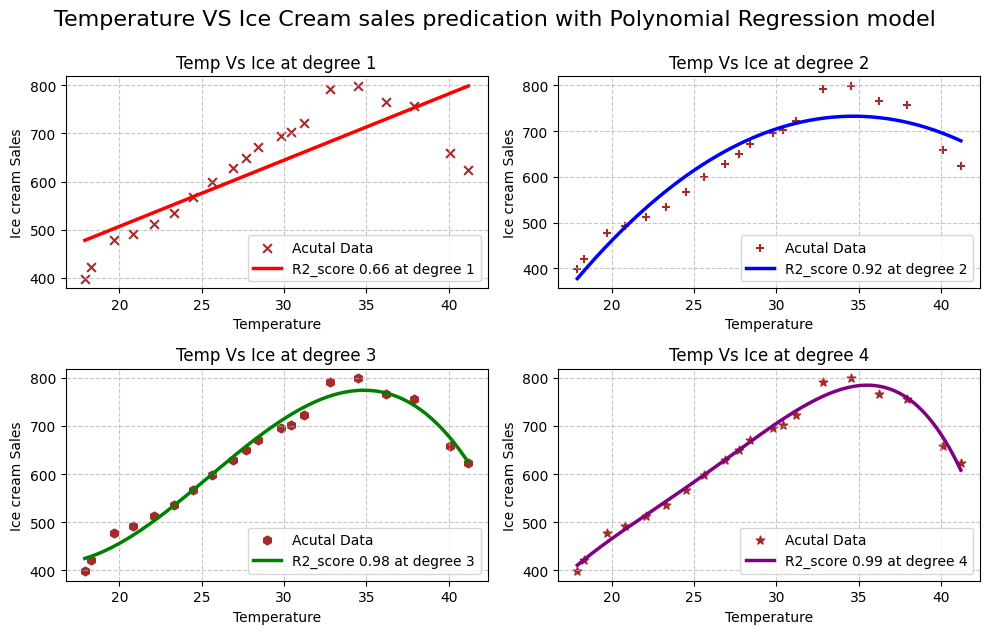

if the R2 score of the model at 1 is 0.6592 , then evaluation of the model = Model needs improvement
if the R2 score of the model at 2 is 0.9177 , then evaluation of the model = Model fits perfectly
if the R2 score of the model at 3 is 0.9816 , then evaluation of the model = Model fits perfectly
if the R2 score of the model at 4 is 0.9887 , then evaluation of the model = Model fits perfectly
-- Model evualtion at certain degrees --


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

degrees = [1,2,3,4]
color=['r','blue','green','purple']
markers = ['x','+','h','*']

plt.figure(figsize=(10,6))

results = []

for i , degree in enumerate(degrees):
    plt.subplot(2,2,i+1)

    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)

    ln_poly = LinearRegression()
    ln_poly.fit(X_poly_train,y_train)

    y_pred_train = ln_poly.predict(X_poly_train)

    # sorting X_train set
    X_smooth = np.linspace(X_train.min(), X_train.max() , 300).reshape(-1,1)
    X_smooth_poly = poly.transform(X_smooth)
    y_pred_smooth = ln_poly.predict(X_smooth_poly)

    R2 = r2_score(y_train,y_pred_train)

    plt.scatter(X_train, y_train, color='brown',marker=markers[i],label='Acutal Data',s=40)
    plt.plot(X_smooth,ln_poly.predict(X_smooth_poly),color=colors[i],linewidth=2.5,label=f'R2_score {R2:.2f} at degree {degree}')
    plt.title(f'Temp Vs Ice at degree {degree}')
    plt.ylabel('Ice cream Sales')
    plt.xlabel('Temperature')
    plt.grid(True, alpha=0.7,linestyle='--')
    plt.legend(loc='lower right')

    results.append({
        'R2_score' : R2,
        'degree' : degree
    })

plt.tight_layout()
plt.suptitle("Temperature VS Ice Cream sales predication with Polynomial Regression model",fontweight=400,fontsize=16,y=1.05)
plt.show()

for result in results:
    degree = result['degree']
    R2_score_train = result['R2_score']

    if R2_score_train > 0.9 :
        accuracy = 'Model fits perfectly'
    elif R2_score_train > 0.8 :
        accuracy = 'Model is okish'
    else:
        accuracy = 'Model needs improvement'



    print(f'if the R2 score of the model at {degree} is {R2_score_train:.4f} , then evaluation of the model = {accuracy}')
print('-- Model evualtion at certain degrees --')
    



as per the results of the model evaulation, we can see that our model perfectly works at degree 4, but that can be overfitting, so we gonna use degree 2, in our model to predict y_test.

R2_score of the model on test set at degree 3 is 0.9779


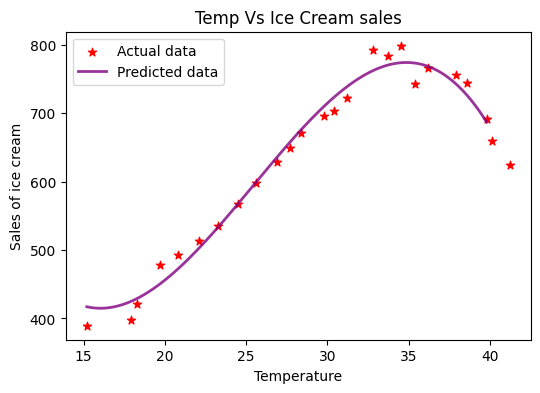

,Acutal Values,Predicted Values,Error
0,742.1,773.194081,-31.094081
1,743.9,725.825208,18.074792
2,389.4,417.108580,-27.708580
3,691.3,686.744046,4.555954
4,784.2,770.203618,13.996382


In [93]:
degree =3
poly=PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ln_poly = LinearRegression()
ln_poly.fit(X_train_poly,y_train)

X_smooth_test = np.linspace(X_test.min(),X_test.max(),200).reshape(-1,1)
X_smooth_test_poly = poly.transform(X_smooth_test)
y_smooth_test_pred = ln_poly.predict(X_smooth_test_poly)

R2_score_test =  r2_score(y_test,ln_poly.predict(X_test_poly))

y_test_predict = ln_poly.predict(X_test_poly)

df_comparsion = pd.DataFrame({
    'Acutal Values':y_test.ravel(),
    'Predicted Values':y_test_predict.ravel(),
    'Error':y_test.ravel() - y_test_predict.ravel()
})

print(f'R2_score of the model on test set at degree {degree} is {R2_score_test:.4f}')

#visualization of the test set on graph
plt.figure(figsize=(6,4))
plt.scatter(X,y,color='r',linewidth=0.8,marker='*',label='Actual data',s=40)
plt.plot(X_smooth_test,y_smooth_test_pred,color='purple',linewidth=2,alpha=0.8,label='Predicted data')
plt.title("Temp Vs Ice Cream sales")
plt.ylabel('Sales of ice cream')
plt.xlabel("Temperature")
plt.legend()
plt.show()
df_comparsion

In [ ]:
#visualization of the test set at degree 3
